In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rfest import GLM, LNP, LNLN
from rfest import build_design_matrix
from rfest.utils import get_n_samples, split_data, fetch_data, uvec
from rfest.check import plot3d, plot_diagnostics

In [2]:
data_liu = fetch_data(4)

(Liu, et al., 2017) is already downloaded. To re-download the same file, please set `overwrite=False`.
Loading data...
Done.


### Vanilla model no spline

In [3]:
dims = [20, 25, 25]
dt = 0.033
num_subunits = 4

n_samples = get_n_samples(20, dt) # 20 mins of the full dataset

X = data_liu['train']['X'][:n_samples]
y = data_liu['train']['y'][:n_samples]
X = build_design_matrix(X[:n_samples], dims[0])
# y = y[:n_samples]

(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt, frac_train=0.5, frac_dev=0.1)

SUMMARY
               N    Minutes   Fraction
Total      36364       20.0        1.0
Train      18182       10.0        0.5
Dev         3636        2.0        0.1
Test       14546        8.0        0.4


In [15]:
sum(y_train) / 18182 / 0.033, sum(y_dev) / 3636 / 0.033

(2.646640200264664, 2.233556689002233)

In [4]:
lnp_nospl = []
lnp_nospl_metric = []
lnp_nospl_time = []
for beta in np.arange(0, 10., 1.):
    lnp = LNP(X_train, y_train, dims=dims, dt=dt)
    lnp.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
             num_iters=1500, verbose=300, tolerance=10,
             beta=beta, step_size=0.1, random_seed=2046,
             fit_history_filter=False)
    lnp_nospl.append(lnp)
    lnp_nospl_metric.append(lnp.metric_dev_opt)
    lnp_nospl_time.append(lnp.total_time_elapsed)
    
    if (np.diff(lnp_nospl_metric) > 0).all():
        continue
    else:
        break    

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    18.848	 -1338.764	   991.738	     0.688	     0.071
  300	   104.266	 -4548.603	  4401.581	     1.000	     0.044
Stop at 301 steps: cost (dev) has been monotonically increasing for 10 steps.

Total time elapsed: 104.551 s.
Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    20.993	   -76.474	   967.595	     0.689	     0.079
  300	   106.338	 -4075.698	  1001.635	     0.992	     0.135
Stop at 331 steps: cost (train) has been changing less than 1e-5 for 10 steps.

Total time elapsed: 115.395 s.
Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    17.357	  1171.933	  1001.326	     0.688	     0.081
  300	   102.009	 -2054.403	  1717.452	     0.781	     0.074
Stop at 532 steps: cost (train) has been changing less than 1e-5 for 10 steps.

Total time elapsed: 169.757 s.
Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    19.789	  2436.61

In [6]:
lnp_nospl_time

[104.5505268573761,
 115.39463996887207,
 169.75662994384766,
 141.78203105926514,
 127.1850848197937,
 137.11924695968628]

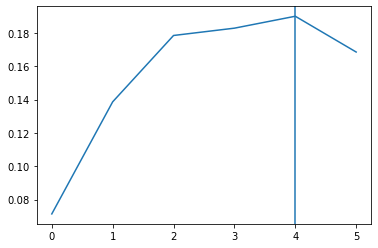

In [7]:
plt.plot(np.arange(0, 10., 1.)[:len(lnp_nospl_metric)], lnp_nospl_metric)
plt.axvline(np.arange(0, 10., 1.)[:len(lnp_nospl_metric)][np.argmax(lnp_nospl_metric)])

In [8]:
lnln_nospl = []
lnln_nospl_metric = []
lnln_nospl_time = []
num_subunits = 4
for beta in np.arange(0, 10., 1.):
    lnln = LNLN(X_train, y_train, dims=dims, dt=dt)
    lnln.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
             num_subunits=num_subunits, num_iters=1500, verbose=300, tolerance=10,
             beta=beta, step_size=0.1, random_seed=2046,
             fit_history_filter=False)
    lnln_nospl.append(lnln)
    lnln_nospl_metric.append(lnln.metric_dev_opt)
    lnln_nospl_time.append(lnln.total_time_elapsed)
    
    if (np.diff(lnln_nospl_metric) > 0).all():
        continue
    else:
        break    

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    18.443	 -1525.802	   252.459	     0.758	     0.075
  300	   113.798	 -4546.604	  1563.565	     1.000	     0.041
Stop at 301 steps: cost (dev) has been monotonically increasing for 10 steps.

Total time elapsed: 114.119 s.
Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    17.305	  3392.771	   237.889	     0.757	     0.073
  300	   113.148	 -2457.850	   368.256	     0.855	     0.099
Stop at 402 steps: cost (train) has been changing less than 1e-5 for 10 steps.

Total time elapsed: 147.136 s.
Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	    17.626	  8195.576	   215.733	     0.753	     0.083
  300	   119.353	 -2054.501	   228.783	     0.938	     0.148
  600	   219.365	 -2209.954	   227.436	     0.929	     0.149
  900	   318.965	 -2243.559	   220.167	     0.913	     0.133
 1200	   418.715	 -2343.939	   223.388	     0.925	     0.138
Stop: reached 1500 step

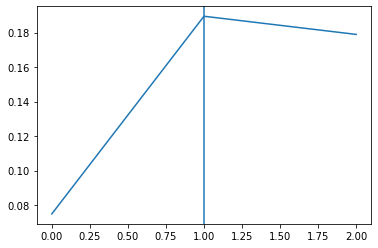

In [11]:
plt.plot(np.arange(0, 10., 1.)[:len(lnln_nospl_metric)], lnln_nospl_metric)
plt.axvline(np.arange(0, 10., 1.)[:len(lnln_nospl_metric)][np.argmax(lnln_nospl_metric)])

In [22]:
lnp_nospl_time, lnln_nospl_time

([104.5505268573761,
  115.39463996887207,
  169.75662994384766,
  141.78203105926514,
  127.1850848197937,
  137.11924695968628],
 [114.11864280700684, 147.1355311870575, 519.8985209465027])

In [23]:
lnp_nospl_best = lnp_nospl[np.argmax(lnp_nospl_metric)]
lnln_nospl_best = lnln_nospl[np.argmax(lnln_nospl_metric)]

In [24]:
def plot_vanilla(lnp0, lnln0, dt=None, shift=None, title=None, response_type='spike', len_time=1, contour=None, figsize=None):
    
    from rfest.utils import get_spatial_and_temporal_filters
    import matplotlib.gridspec as gridspec
    import warnings
    warnings.filterwarnings("ignore")
    
    dims = lnln0.dims
    dt = lnln0.dt if dt is None else dt
    shift = 0 if shift is None else -shift
    t_tRF = np.linspace(-(dims[0]-shift)*dt, shift*dt, dims[0]+1)[1:]

    fig = plt.figure(figsize=figsize) if figsize is not None else (12,4)
    
    for counter, (lnp, lnln) in enumerate([(lnp0, lnln0)]):
        
        (idx0, idx1) = (0, 1) if counter == 0 else (2, 3)

#         ws = uvec(lnln.w_opt)
        ws = lnln.w_opt
        num_subunits = ws.shape[1]

        sRFs_max = []
        sRFs_min = []
        tRFs = []
        for i in range(num_subunits):
            w = ws[:, i].reshape(dims)
            sRF, tRF = get_spatial_and_temporal_filters(w, dims)

            ref = [sRF[2:, 2:].max(), sRF[2:, 2:].min()][np.argmax([np.abs(sRF.max()), np.abs(sRF.min())])]
            max_coord = np.where(sRF == ref)
            tRF = w[:, max_coord[0], max_coord[1]].flatten()
            tRF_max = np.argmax(tRF)
            sRF_max = w[tRF_max]
            sRFs_max.append(sRF_max)
            tRF_min = np.argmin(tRF)
            sRF_min = w[tRF_min]
            sRFs_min.append(sRF_min)
            tRFs.append(tRF)

        sRFs_max = np.stack(sRFs_max)
        sRFs_min = np.stack(sRFs_min)

        vmax = np.max([np.abs(sRFs_max.max()), np.abs(sRFs_max.min()), np.abs(sRFs_min.max()), np.abs(sRFs_min.min())])

        ncols = num_subunits
        ncols += 2 # add lnp
        nrows = 4

        spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)  
        axs = []
        ax_sRF_mins= []
        ax_sRF_maxs = []    

        # LNP
        w_lnp = lnp.w_opt.reshape(dims)
        vmax_lnp = np.max([np.abs(w_lnp.max()), np.abs(w_lnp.min())])
        sRF_lnp, tRF_lnp = get_spatial_and_temporal_filters(w_lnp, dims)
        ref = [sRF_lnp[2:, 2:].max(), sRF_lnp[2:, 2:].min()][np.argmax([np.abs(sRF_lnp.max()), np.abs(sRF_lnp.min())])]
        max_coord = np.where(sRF_lnp == ref)
        tRF_lnp = w_lnp[:, max_coord[0], max_coord[1]].flatten()
        tRF_max = np.argmax(tRF_lnp)
        sRF_max = w_lnp[tRF_max]
        tRF_min = np.argmin(tRF_lnp)
        sRF_min = w_lnp[tRF_min]

        ax_sRF_min = fig.add_subplot(spec[idx0, 0])       
        ax_sRF_min.imshow(sRF_min, cmap=plt.cm.bwr, vmax=vmax_lnp, vmin=-vmax_lnp, aspect='auto')
        ax_sRF_min.set_xticks([])
        ax_sRF_min.set_yticks([])
        if counter == 0:
            ax_sRF_min.set_title(f'LNP')

        if counter == 0:
            ax_sRF_min.set_ylabel('No Spline')
        else:
            ax_sRF_min.set_ylabel('Spline')
            
        ax_sRF_mins.append(ax_sRF_min)
        
        ax_tRF = fig.add_subplot(spec[idx1, 0])       
        ax_tRF.plot(t_tRF, tRF_lnp, color='black')
        ax_tRF.spines['top'].set_visible(False)
        ax_tRF.spines['right'].set_visible(False)
#         ax_tRF.set_yticks([])
        ax_tRF.set_xticks([])
#         tRF_max = np.argmax(tRFs[i])
        tRF_min = np.argmin(tRF_lnp)
#         ax_tRF.axvline(t_tRF[tRF_max], color='C3', linestyle='--', alpha=0.6)
        ax_tRF.axvline(t_tRF[tRF_min], color='C0', linestyle='--', alpha=0.6)
    
        vmax_tRF = np.max([np.abs(w_lnp.min()), np.abs(w_lnp.max()), np.abs(ws.min()), np.abs(ws.max())])
        ax_tRF.set_ylim(-vmax_tRF, vmax_tRF)
        # LNLN subunits

        for i in range(num_subunits):
            ax_sRF_min = fig.add_subplot(spec[idx0, i+1])       
            ax_sRF_min.imshow(sRFs_min[i], cmap=plt.cm.bwr, vmax=vmax, vmin=-vmax, aspect='auto')
            ax_sRF_min.set_xticks([])
            ax_sRF_min.set_yticks([])
            if i == 0 and counter == 0:
                ax_sRF_min.set_title(f'LNLN')

            ax_sRF_mins.append(ax_sRF_min)
            
            ax_tRF = fig.add_subplot(spec[idx1, i+1])       
            ax_tRF.plot(t_tRF, tRFs[i], color='black')
            ax_tRF.spines['top'].set_visible(False)
            ax_tRF.spines['right'].set_visible(False)
            ax_tRF.set_yticks([]) 
            ax_tRF.set_xticks([])
    #         tRF_max = np.argmax(tRFs[i])
            tRF_min = np.argmin(tRFs[i])
        
    #         ax_tRF.axvline(t_tRF[tRF_max], color='C3', linestyle='--', alpha=0.6)
            ax_tRF.axvline(t_tRF[tRF_min], color='C0', linestyle='--', alpha=0.6)
            ax_tRF.set_ylim(-vmax_tRF, vmax_tRF)
#             ax_tRF.set_ylim(-0.1, 0.1)


        if contour is not None and counter == 1: # then plot contour

            for i in range(num_subunits+1):

                color_min = 'black' if i == 0 else 'lightsteelblue'
                color_max = 'black' if i == 0 else 'lightcoral'

                ax_sRF_mins[i].contour(sRF_min, levels=[-contour], colors=[color_min], linestyles=['-'], alpha=1)

                for j in range(num_subunits):
                    if i-1 != j:
                        color = 'grey'
                        alpha = 0.5
                        style = '--'                    
                    else:
                        color = 'black'
                        alpha = 1
                        style = '--'
                    ax_sRF_mins[i].contour(sRFs_min[j], levels=[-contour], colors=[color], linestyles=[style], alpha=alpha)
            
    plt.subplots_adjust(wspace=0.5)






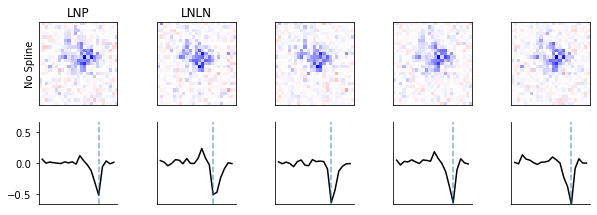

In [25]:
plot_vanilla(lnp_nospl_best, lnln_nospl_best, figsize=(12, 3.5*2))
plt.savefig('figs/Figure8a1.pdf')

In [26]:
div = int(X_test.shape[0]/4)
cc_test_vanilla = np.array([[m.score(X_test[i*div:(i+1)*div], y_test[i*div:(i+1)*div]) for m in [lnp_nospl_best, lnln_nospl_best]] for i in range(4)])

In [27]:
cc_test_vanilla

array([[0.15835939, 0.18905382],
       [0.18182629, 0.19020814],
       [0.13541479, 0.1838887 ],
       [0.14027695, 0.16000965]])

### Select intial degrees of freedom based on cross-validated MLE prediction

In [3]:
dims = [20, 25, 25]
dt = 0.033
num_subunits = 4

n_samples = get_n_samples(20, dt) # 20 mins of the full dataset

X = data_liu['train']['X'][:n_samples]
y = data_liu['train']['y'][:n_samples]
# X = build_design_matrix(X[:n_samples], dims[0])
# y = y[:n_samples]

(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt, frac_train=0.5, frac_dev=0.1)


SUMMARY
               N    Minutes   Fraction
Total      36364       20.0        1.0
Train      18182       10.0        0.5
Dev         3636        2.0        0.1
Test       14546        8.0        0.4


In [4]:
def build_model(df):
    
    m = GLM(distr='poisson', output_nonlinearity='softplus')
    m.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='softplus', name='stimulus') # light stimulus
    m.add_design_matrix(X_dev, dims=dims, name='stimulus', kind='dev')
    m.initialize({'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
    
    return m

In [51]:
np.floor(np.array(dims) * 1 / 3), np.floor(np.array(dims) * 2 / 3), 

(array([6., 8., 8.]), array([13., 16., 16.]))

In [52]:
import time
dfts = np.arange(6, 13+1, 1)
dfss = np.arange(8, 16+1, 1)

ms = []
results = {}
heatmap_ = np.zeros([len(dfts), len(dfss)])

i = 0
for ii, dft in enumerate(dfts):
    for jj, dfs in enumerate(dfss):
        df = [dft, dfs, dfs]
        time_start= time.time()
        m = build_model(df)
        time_elapsed = time.time() - time_start
        metric_dev = m._score(m.y['dev'], m.forwardpass(m.p['mle'], 'dev'), 'corrcoef')
        results[i] = {'df': df, 'metric': metric_dev, 'time': time_elapsed}
        
        heatmap[ii, jj] = metric_dev

        print(results[i])
        i+= 1

{'df': [6, 8, 8], 'metric': 0.18143803160391578, 'time': 3.719245195388794}
{'df': [6, 9, 9], 'metric': 0.1856284297205215, 'time': 3.647449016571045}
{'df': [6, 10, 10], 'metric': 0.1733050440597021, 'time': 3.8185958862304688}
{'df': [6, 11, 11], 'metric': 0.18284391187676438, 'time': 4.297021865844727}
{'df': [6, 12, 12], 'metric': 0.18406338039236494, 'time': 4.833588123321533}
{'df': [6, 13, 13], 'metric': 0.182405435723783, 'time': 5.435270071029663}
{'df': [6, 14, 14], 'metric': 0.17522939432642728, 'time': 6.66328763961792}
{'df': [6, 15, 15], 'metric': 0.1701497297324601, 'time': 7.976320028305054}
{'df': [6, 16, 16], 'metric': 0.1614481334127242, 'time': 8.995028018951416}
{'df': [7, 8, 8], 'metric': 0.16755941309591751, 'time': 3.0943212509155273}
{'df': [7, 9, 9], 'metric': 0.1734275445237841, 'time': 3.6099400520324707}
{'df': [7, 10, 10], 'metric': 0.16198689373195163, 'time': 4.1232008934021}
{'df': [7, 11, 11], 'metric': 0.16299988709196966, 'time': 4.68812894821167}
{'

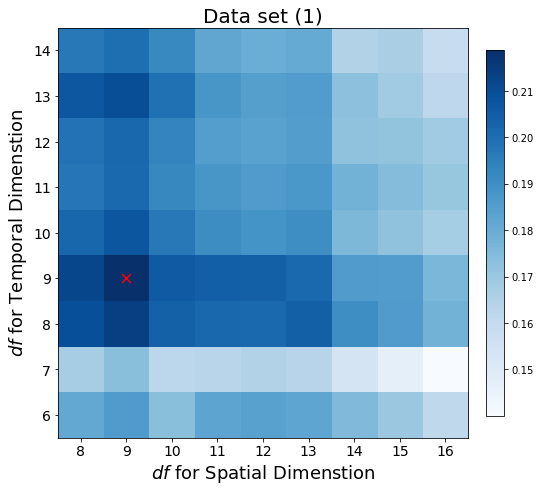

In [63]:
max_y, max_x = np.where(heatmap.max() == heatmap)
fig, ax = plt.subplots(figsize=(8,8))
cbar = ax.imshow(heatmap[:, :-1], cmap=plt.cm.Blues, origin='lower')
ax.set_xticks(np.arange(-0, len(dfss), 1))
ax.set_xticklabels(np.hstack([dfss, 16]), fontsize=14)
ax.set_yticklabels(np.hstack([0, dfts, 14]), fontsize=14)
ax.scatter(max_x, max_y, color='red', marker='x', s=80)
ax.set_xlabel('$df$ for Spatial Dimenstion', fontsize=18)
ax.set_ylabel('$df$ for Temporal Dimenstion', fontsize=18)
fig.colorbar(cbar,fraction=0.041, pad=0.04)
ax.set_title('Data set (1)', fontsize=20)
# cbar.set_label('CV performance')
fig.savefig('figs/Figure_CV_a.pdf')

In [54]:
np.sum([results[i]['time'] for i in range(len(results))]) / 60

11.27667602300644

In [46]:
ms_lnpspl = []
mdev_lnpspl = []
lnp_spl_time = []

for beta in np.arange(0.5 , 1.5, .1):
    
    lnp_spl = GLM(distr='poisson', output_nonlinearity='softplus')
    lnp_spl.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='softplus', name='stimulus') # light stimulus
    lnp_spl.add_design_matrix(X_dev, name='stimulus', kind='dev')
    lnp_spl.initialize({'train': y_train, 'dev': y_dev}, num_subunits=1, dt=dt, method='mle', random_seed=2046)
    lnp_spl.fit(num_iters=1500, verbose=100, step_size=0.1, beta=beta)
    mdev_lnpspl.append(lnp_spl.metric_dev_opt)
    ms_lnpspl.append(lnp_spl)
    lnp_spl_time.append(lnp_spl.total_time_elapsed)
    print(beta, mdev_lnpspl[-1])
    plt.show()
    
    if (np.diff(mdev_lnpspl) > 0).all():
        continue
    else:
        break

Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.098	 20850.290	  3921.579	     0.225	     0.194
  100	     3.812	  3874.952	   730.284	     0.577	     0.412
  200	     6.522	  3753.043	   705.842	     0.577	     0.434
  300	     9.216	  3740.650	   704.687	     0.575	     0.435
  400	    12.754	  3739.570	   705.042	     0.574	     0.435
Stop at 483 steps: cost (dev) has been monotonically increasing for 10 steps.

0.5 0.4366116149134391
Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     0.984	 20859.371	  3921.482	     0.229	     0.196
  100	     3.688	  3928.623	   725.220	     0.570	     0.424
  200	     6.354	  3811.088	   700.778	     0.570	     0.443
  300	     9.017	  3799.846	   698.878	     0.568	     0.445
  400	    12.550	  3798.980	   699.565	     0.567	     0.443
Stop at 423 steps: cost (dev) has been monotonically increasing for 10 steps.

0.6 0.4454759204976407
Iters	  Time (s)	Cost (train)	Cost (dev)

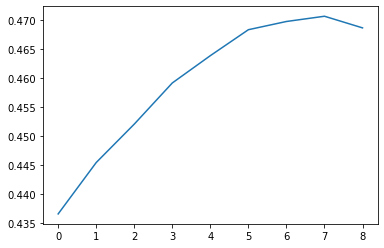

In [47]:
plt.plot(mdev_lnpspl)

In [18]:
lnp_nospl_time=[104.5505268573761,
  115.39463996887207,
  169.75662994384766,
  141.78203105926514,
  127.1850848197937,
  137.11924695968628],
lnln_nospl_time=[114.11864280700684, 147.1355311870575, 519.8985209465027]

In [48]:
np.array(lnp_spl_time)

array([15.67818189, 13.3658917 , 15.61581421, 43.72547483, 17.40795183,
       15.91633487, 13.512429  , 37.30452514, 52.34313321])

In [49]:
np.array(lnln_spl_time)

array([ 49.38274264,  44.96216083, 144.36834979,  78.61284208,
        81.35455799, 131.46786118,  67.52511096])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa62f71c310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa62f73f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa62f724210>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa62f73fd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa62f723550>,
 'means': []}

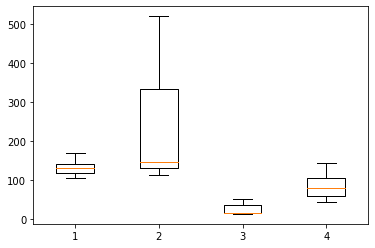

In [50]:
plt.boxplot([np.array(lnp_nospl_time), np.array(lnln_nospl_time), np.array(lnp_spl_time), np.array(lnln_spl_time)])

In [51]:
lnp_spl = ms_lnpspl[np.argmax(mdev_lnpspl)]
lnln_spl = ms_lnlnspl[np.argmax(mdev_lnlnspl)]

In [26]:
df = [9,9,9]
ms_lnlnspl = []
mdev_lnlnspl = []
lnln_spl_time = []

for beta in np.arange(0.5 , 1.5, .1):
    
    lnln_spl = GLM(distr='poisson', output_nonlinearity='softplus')
    lnln_spl.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='softplus', name='stimulus') # light stimulus
    lnln_spl.add_design_matrix(X_dev, name='stimulus', kind='dev')
    lnln_spl.initialize({'train': y_train, 'dev': y_dev}, num_subunits=4, dt=dt, method='mle', random_seed=2046)
    lnln_spl.fit(num_iters=1500, verbose=100, step_size=0.1, beta=beta)
    
    mdev_lnlnspl.append(lnln_spl.metric_dev_opt)
    ms_lnlnspl.append(lnln_spl)
    lnln_spl_time.append(lnln_spl.total_time_elapsed)
    
    print(beta, mdev_lnlnspl[-1])
    plt.show()
    
    if (np.diff(mdev_lnlnspl) > 0).all():
        continue
    else:
        break

Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.259	 51670.228	  9972.901	     0.185	     0.156
  100	     9.965	  4189.365	   783.629	     0.551	     0.420
  200	    18.675	  3697.829	   711.795	     0.623	     0.439
  300	    27.488	  3535.574	   692.600	     0.652	     0.441
  400	    37.234	  3471.663	   687.852	     0.670	     0.436
  500	    46.877	  3432.175	   686.527	     0.685	     0.441
Stop at 526 steps: cost (dev) has been monotonically increasing for 10 steps.

0.5 0.43733317901174723
Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.312	 51706.201	  9974.141	     0.187	     0.156
  100	    10.123	  4237.636	   780.707	     0.543	     0.428
  200	    18.816	  3776.416	   707.735	     0.608	     0.447
  300	    27.526	  3632.227	   686.729	     0.631	     0.454
  400	    37.138	  3578.663	   680.121	     0.646	     0.457
Stop at 481 steps: cost (dev) has been monotonically increasing for 10 steps.

0

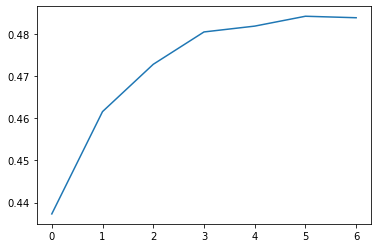

In [27]:
plt.plot(mdev_lnlnspl)

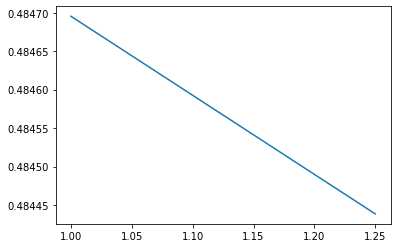

In [52]:
plt.plot(np.arange(1, 2, 0.25)[:len(mdev)], mdev)

In [132]:
m_lnln = GLM(distr='poisson', output_nonlinearity='softplus')
m_lnln.add_design_matrix(X_train, dims=dims, df=df, smooth='cr', filter_nonlinearity='softplus', name='stimulus') # light stimulus
m_lnln.add_design_matrix(X_dev, name='stimulus', kind='dev')
m_lnln.initialize({'train': y_train, 'dev': y_dev}, num_subunits=4, dt=dt, method='mle', random_seed=2046)
m_lnln.fit(num_iters=2000, verbose=100, step_size=0.1, beta=1.)

Iters	  Time (s)	Cost (train)	Cost (dev)	corrcoef (train)	corrcoef (dev)
    0	     1.582	 51850.094	  9973.878	     0.191	     0.162
  100	    11.032	  4393.545	   777.782	     0.516	     0.437
  200	    19.965	  4027.599	   697.980	     0.558	     0.471
  300	    28.984	  3899.193	   675.326	     0.574	     0.478
  400	    38.871	  3865.653	   668.129	     0.580	     0.481
  500	    48.579	  3855.573	   666.970	     0.583	     0.481
  600	    58.272	  3853.440	   664.959	     0.586	     0.483
  700	    67.975	  3852.025	   664.293	     0.587	     0.482
  800	    77.661	  3851.553	   664.121	     0.588	     0.483
  900	    87.386	  3851.216	   664.273	     0.588	     0.482
 1000	    97.086	  3852.082	   664.732	     0.588	     0.482
Stop at 1095 steps: cost (dev) has been monotonically increasing for 10 steps.



In [34]:
from rfest.check import significance

def plot_spline(lnp0, lnln0, dt=None, shift=None, title=None, response_type='spike', len_time=1, contour=None, figsize=None):
    
    from rfest.utils import get_spatial_and_temporal_filters
    import matplotlib.gridspec as gridspec
    import warnings
    warnings.filterwarnings("ignore")
    
    dims = lnln0.dims['stimulus']
    dt = lnln0.dt if dt is None else dt
    shift = 0 if shift is None else -shift
    t_tRF = np.linspace(-(dims[0]-shift)*dt, shift*dt, dims[0]+1)[1:]

    W_score_lnp, p_values_lnp = significance(lnp0, 'opt')
    W_score_lnln, p_values_lnln = significance(lnln0, 'opt')
    
    fig = plt.figure(figsize=figsize) if figsize is not None else (12,4)
    
    for counter, (lnp, lnln) in enumerate([(lnp0, lnln0)]):
        
        (idx0, idx1) = (0, 1) if counter == 0 else (2, 3)

#         ws = uvec(lnln.w_opt)
        ws = np.hstack([lnln.w['opt'][name] for name in lnln.w['opt']])
        num_subunits = ws.shape[1]

        sRFs_max = []
        sRFs_min = []
        tRFs = []
        tRFs_u = []
        tRFs_l = []
        for i, name in enumerate(lnln0.filter_names):
            w = lnln.w['opt'][name].flatten()
            w_se = lnln.w_se['opt'][name].flatten()
            wu = w + 2 * w_se
            wl = w - 2 * w_se
            
            w = w.reshape(dims)
            wu = wu.reshape(dims)
            wl = wl.reshape(dims)
            
            sRF, tRF = get_spatial_and_temporal_filters(w, dims)

            ref = [sRF[2:, 2:].max(), sRF[2:, 2:].min()][np.argmax([np.abs(sRF.max()), np.abs(sRF.min())])]
            max_coord = np.where(sRF == ref)
            tRF = w[:, max_coord[0], max_coord[1]].flatten()
            tRFu = wu[:, max_coord[0], max_coord[1]].flatten()
            tRFl = wl[:, max_coord[0], max_coord[1]].flatten()

            tRF_max = np.argmax(tRF)
            sRF_max = w[tRF_max]
            sRFs_max.append(sRF_max)
            tRF_min = np.argmin(tRF)
            sRF_min = w[tRF_min]
            sRFs_min.append(sRF_min)
            tRFs.append(tRF)
            tRFs_u.append(tRFu)
            tRFs_l.append(tRFl)

        sRFs_max = np.stack(sRFs_max)
        sRFs_min = np.stack(sRFs_min)

        vmax = np.max([np.abs(sRFs_max.max()), np.abs(sRFs_max.min()), np.abs(sRFs_min.max()), np.abs(sRFs_min.min())])

        ncols = num_subunits
        ncols += 2 # add lnp
        nrows = 4

        spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)  
        axs = []
        ax_sRF_mins= []
        ax_sRF_maxs = []    

        # LNP
        w_lnp = lnp.w['opt']['stimulus'].flatten()
        w_se_lnp = lnp.w_se['opt']['stimulus'].flatten()
        wu_lnp = w_lnp + 2 * w_se_lnp
        wl_lnp = w_lnp - 2 * w_se_lnp
        
        w_lnp = w_lnp.reshape(dims)
        wu_lnp = wu_lnp.reshape(dims)
        wl_lnp = wl_lnp.reshape(dims)
        
        vmax_lnp = np.max([np.abs(w_lnp.max()), np.abs(w_lnp.min())])
        sRF_lnp, tRF_lnp = get_spatial_and_temporal_filters(w_lnp, dims)
        ref = [sRF_lnp[2:, 2:].max(), sRF_lnp[2:, 2:].min()][np.argmax([np.abs(sRF_lnp.max()), np.abs(sRF_lnp.min())])]
        max_coord = np.where(sRF_lnp == ref)
        
        tRF_lnp = w_lnp[:, max_coord[0], max_coord[1]].flatten()
        tRFu_lnp = wu_lnp[:, max_coord[0], max_coord[1]].flatten()
        tRFl_lnp = wl_lnp[:, max_coord[0], max_coord[1]].flatten()
        
        tRF_max = np.argmax(tRF_lnp)
        sRF_max = w_lnp[tRF_max]
        tRF_min = np.argmin(tRF_lnp)
        sRF_min = w_lnp[tRF_min]

        ax_sRF_min = fig.add_subplot(spec[idx0, 0])       
        ax_sRF_min.imshow(sRF_min, cmap=plt.cm.bwr, vmax=vmax_lnp, vmin=-vmax_lnp, aspect='auto')
        ax_sRF_min.set_xticks([])
        ax_sRF_min.set_yticks([])
#         ax_sRF_min.set_title(f'')
        p = p_values_lnp['stimulus']

        stars = '*'

        if p < 0.001:
            stars *= 3
            ax_sRF_min.set_title(f'p<0.001{stars} ', fontsize=14)
        elif p<0.01:
            stars *= 2
            ax_sRF_min.set_title(f'p<0.01{stars} ', fontsize=14)
        elif p<0.05:
            stars *= 1
            ax_sRF_min.set_title(f'p<0.05{stars} ', fontsize=14)
        else:
            stars = '[n.s.]'
            ax_sRF_min.set_title(f'p>0.05{stars} ', fontsize=14)

#         ax_sRF_min.set_ylabel('Spline')
            
        ax_sRF_mins.append(ax_sRF_min)
        
        ax_tRF = fig.add_subplot(spec[idx1, 0])       
        ax_tRF.plot(t_tRF, tRF_lnp, color='black')
        ax_tRF.fill_between(t_tRF, tRFu_lnp, tRFl_lnp, color='gray', alpha=0.5)


        ax_tRF.spines['top'].set_visible(False)
        ax_tRF.spines['right'].set_visible(False)
#         ax_tRF.set_yticks([])
        ax_tRF.set_xticks([])
#         tRF_max = np.argmax(tRFs[i])
        tRF_min = np.argmin(tRF_lnp)
#         ax_tRF.axvline(t_tRF[tRF_max], color='C3', linestyle='--', alpha=0.6)
        ax_tRF.axvline(t_tRF[tRF_min], color='C0', linestyle='--', alpha=0.6)
    
        vmax_tRF = np.max([np.abs(w_lnp.min()), np.abs(w_lnp.max()), np.abs(ws.min()), np.abs(ws.max())])
        ax_tRF.set_ylim(-vmax_tRF, vmax_tRF)
        # LNLN subunits

        for i, name in enumerate(lnln0.filter_names):
            ax_sRF_min = fig.add_subplot(spec[idx0, i+1])       
            ax_sRF_min.imshow(sRFs_min[i], cmap=plt.cm.bwr, vmax=vmax, vmin=-vmax, aspect='auto')
            ax_sRF_min.set_xticks([])
            ax_sRF_min.set_yticks([])
            if i == 0 and counter == 0:
                ax_sRF_min.set_title(f'LNLN')

            ax_sRF_mins.append(ax_sRF_min)
            
            ax_tRF = fig.add_subplot(spec[idx1, i+1])       
            ax_tRF.plot(t_tRF, tRFs[i], color='black')
            ax_tRF.fill_between(t_tRF, tRFs_u[i], tRFs_l[i], color='gray', alpha=0.5)
            ax_tRF.spines['top'].set_visible(False)
            ax_tRF.spines['right'].set_visible(False)
            ax_tRF.set_yticks([]) 
            ax_tRF.set_xlabel('Time Lag (s)', fontsize=14)
#             ax_tRF.set_xticks([])
    #         tRF_max = np.argmax(tRFs[i])
            tRF_min = np.argmin(tRFs[i])
            
    #         ax_tRF.axvline(t_tRF[tRF_max], color='C3', linestyle='--', alpha=0.6)
            ax_tRF.axvline(t_tRF[tRF_min], color='C0', linestyle='--', alpha=0.6)
            ax_tRF.set_ylim(-vmax_tRF, vmax_tRF)
#             ax_tRF.set_ylim(-0.1, 0.1)

            p = p_values_lnln[name]

            stars = '*'

            if p < 0.001:
                stars *= 3
                ax_sRF_min.set_title(f'p<0.001{stars} ', fontsize=14)
            elif p<0.01:
                stars *= 2
                ax_sRF_min.set_title(f'p<0.01{stars} ', fontsize=14)
            elif p<0.05:
                stars *= 1
                ax_sRF_min.set_title(f'p<0.05{stars} ', fontsize=14)
            else:
                stars = '[n.s.]'
                ax_sRF_min.set_title(f'p>0.05{stars} ', fontsize=14)

        if contour is not None and counter == 0: # then plot contour

            for i in range(num_subunits+1):

                color_min = 'black' if i == 0 else 'gray'
                color_max = 'black' if i == 0 else 'gray'

                ax_sRF_mins[i].contour(sRF_min, levels=[-contour], colors=[color_min], linestyles=['-'], alpha=1)

                for j in range(num_subunits):
                    if i-1 != j:
                        color = 'grey'
                        alpha = 0.5
                        style = '--'                    
                    else:
                        color = 'black'
                        alpha = 1
                        style = '--'
                    ax_sRF_mins[i].contour(sRFs_min[j], levels=[-contour], colors=[color], linestyles=[style], alpha=alpha)
            
    plt.subplots_adjust(wspace=0.5)







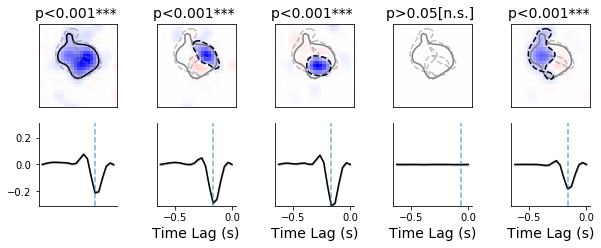

In [60]:
plot_spline(lnp_spl, lnln_spl, figsize=(12, 3.5*2), contour=0.045)
plt.savefig('figs/Figure8a2.pdf')

In [61]:
div = int(X_test.shape[0]/4)
cc_test_spline = np.array([[m.score(X_test[i*div:(i+1)*div], y_test[i*div:(i+1)*div]) for m in [lnp_spl, lnln_spl]] for i in range(4)])

In [62]:
cc_test_vanilla= np.array([[0.15835939, 0.18905382],
       [0.18182629, 0.19020814],
       [0.13541479, 0.1838887 ],
       [0.14027695, 0.16000965]])

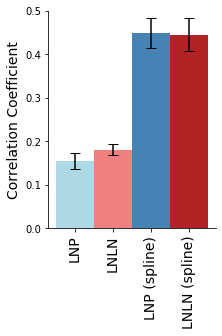

In [63]:
cc_test = np.hstack([cc_test_vanilla, cc_test_spline])
cc_test_mean = cc_test.mean(0)


cc_test_std = cc_test.std(0)
fig, ax_bar = plt.subplots(figsize=(3,4))

x = [0, 1, 2, 3]
ax_bar.bar(x, cc_test_mean, yerr=cc_test_std, width=1, color=['lightblue', 'lightcoral', 'steelblue', 'firebrick'], capsize=5)
labels = ['LNP',  'LNLN', 'LNP (spline)', 'LNLN (spline)']

ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(labels, rotation=90, fontsize=14)
ax_bar.set_ylim(0, 0.5)
ax_bar.set_ylabel('Correlation Coefficient', fontsize=14)

plt.savefig('figs/Figure8a3.pdf')

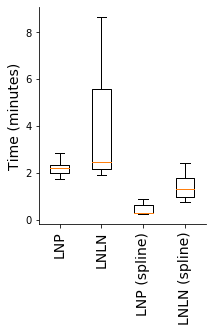

In [75]:
fig, ax_box = plt.subplots(figsize=(3,4))
ax_box.boxplot([np.array(lnp_nospl_time)/60, np.array(lnln_nospl_time)/60, np.array(lnp_spl_time)/60, np.array(lnln_spl_time)/60])

labels = ['LNP',  'LNLN', 'LNP (spline)', 'LNLN (spline)']

ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_ylabel('Time (minutes)', fontsize=14)
# ax_box.set_xticks(x)
ax_box.set_xticklabels(labels, rotation=90, fontsize=14)

plt.savefig('figs/Figure8a4.pdf')